Anzahl unterschiedlicher PARTICIPANT_IDs: 11


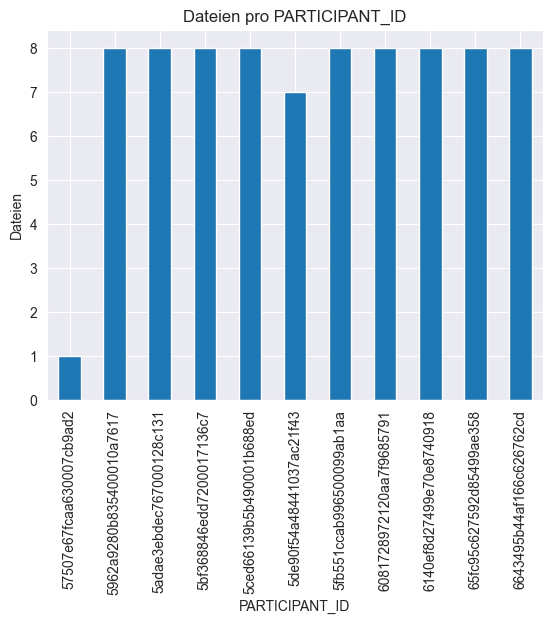

Gesamtnutzungszeit pro PARTICIPANT_ID (ms):
PARTICIPANT_ID
57507e67fcaa630007cb9ad2     124106
5962a9280b835400010a7617    1000373
5adae3ebdec767000128c131     796907
5bf368846edd7200017136c7     502012
5ced66139b5b490001b688ed     659544
5de90f54a48441037ac21f43     445133
5fb551ccab996500099ab1aa     969339
6081728972120aa7f9685791    1783651
6140ef8d27499e70e8740918    1402205
65fc95c627592d85499ae358    1927899
6643495b44af166c626762cd     879850
dtype: int64


C:\Users\Ich\AppData\Local\Temp\ipykernel_3616\2076461186.py:33: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  usage_times = data.groupby('PARTICIPANT_ID').apply(usage_time)


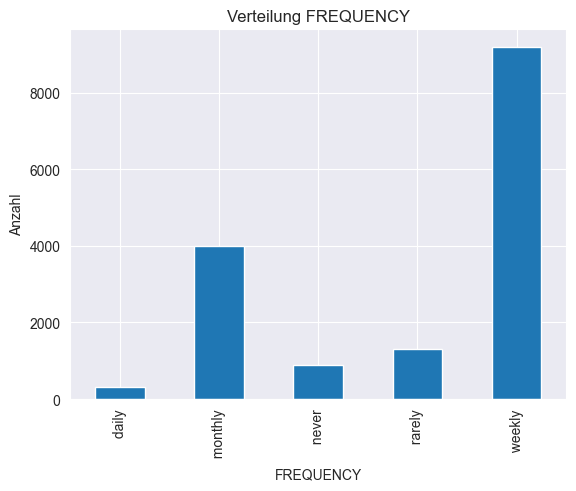

Länge der PROMPT-Spalte pro Datei:
SOURCE_FILE
data/keystrokes\experiment_57507e67fcaa630007cb9ad2_20250819161322.csv     79212
data/keystrokes\experiment_5962a9280b835400010a7617_20250819171658.csv     66720
data/keystrokes\experiment_5962a9280b835400010a7617_20250819171842.csv     20655
data/keystrokes\experiment_5962a9280b835400010a7617_20250819172140.csv    118038
data/keystrokes\experiment_5962a9280b835400010a7617_20250819172308.csv      5874
                                                                           ...  
data/keystrokes\experiment_6643495b44af166c626762cd_20250819160208.csv     59250
data/keystrokes\experiment_6643495b44af166c626762cd_20250819160307.csv     12198
data/keystrokes\experiment_6643495b44af166c626762cd_20250819160610.csv     87100
data/keystrokes\experiment_6643495b44af166c626762cd_20250819160707.csv     10506
data/keystrokes\experiment_6643495b44af166c626762cd_20250819160831.csv     20904
Length: 80, dtype: int64


C:\Users\Ich\AppData\Local\Temp\ipykernel_3616\2076461186.py:49: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prompt_lengths = data.groupby('SOURCE_FILE').apply(prompt_length_per_file)


In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from numpy.ma.core import count

# Alle CSV-Dateien im Ordner 'keystrokes' einlesen
folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

dfs = []
for file in all_files:
    df = pd.read_csv(file)
    df['SOURCE_FILE'] = file  # Dateiherkunft merken
    dfs.append(df)
data = pd.concat(dfs, ignore_index=True)

# 1. Anzahl unterschiedlicher PARTICIPANT_IDs
unique_participants = data['PARTICIPANT_ID'].nunique()
print(f"Anzahl unterschiedlicher PARTICIPANT_IDs: {unique_participants}")

# 2. Plot: Anzahl Dateien pro PARTICIPANT_ID
files_per_participant = data.groupby('PARTICIPANT_ID')['SOURCE_FILE'].nunique()
files_per_participant.plot(kind='bar')
plt.title('Dateien pro PARTICIPANT_ID')
plt.xlabel('PARTICIPANT_ID')
plt.ylabel('Dateien')
plt.show()

# 3. Gesamtnutzungszeit pro PARTICIPANT_ID (letzte RELEASE_TIME - erste PRESS_TIME)
def usage_time(df):
    return df['RELEASE_TIME'].max() - df['PRESS_TIME'].min()

usage_times = data.groupby('PARTICIPANT_ID').apply(usage_time)
print("Gesamtnutzungszeit pro PARTICIPANT_ID (ms):")
print(usage_times)

# 4. Verteilung der FREQUENCY-Spalte
plt.figure()
data['FREQUENCY'].value_counts().sort_index().plot(kind='bar')
plt.title('Verteilung FREQUENCY')
plt.xlabel('FREQUENCY')
plt.ylabel('Anzahl')
plt.show()

# 5. Länge der PROMPT-Spalte pro Datei
def prompt_length_per_file(df):
    return df['PROMPT'].astype(str).apply(len).sum()

prompt_lengths = data.groupby('SOURCE_FILE').apply(prompt_length_per_file)
print("Länge der PROMPT-Spalte pro Datei:")
print(prompt_lengths)

In [50]:
import os
import pandas as pd


folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

dfs = []
for file in all_files:
    df = pd.read_csv(file)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data = pd.concat(dfs, ignore_index=True)

uniqueIds = data.PARTICIPANT_ID.nunique()
print(f"count of unique Participant ids: {uniqueIds}")

count of unique Participant ids: 11


In [51]:
# count columns
df_rows_count_current = []
for file in all_files:
    df_current = pd.read_csv(file)
    df_current['ROW_COUNT'] = len(df_current)
    df_rows_count_current.append(df_current)
df_rows_count = pd.concat(df_rows_count_current, ignore_index=True)

print(df_rows_count)

                 PARTICIPANT_ID   EXPERIMENTTYPE  EXPERIMENTATTEMPT  \
0      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
1      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
2      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
3      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
4      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
...                         ...              ...                ...   
15684  6643495b44af166c626762cd   text-to-prompt                  1   
15685  6643495b44af166c626762cd   text-to-prompt                  1   
15686  6643495b44af166c626762cd   text-to-prompt                  1   
15687  6643495b44af166c626762cd   text-to-prompt                  1   
15688  6643495b44af166c626762cd   text-to-prompt                  1   

       TOTALATTEMPTCOUNT  LATINSQUARETYPE  \
0                      0                0   
1                      0                0   
2           

In [52]:
# calculate time passing for each file

df_calculate_time_current = []
for file in all_files:
    df_current = pd.read_csv(file)
    df_current['TIME_PASSING'] = df_current['RELEASE_TIME'] - df_current['PRESS_TIME']
    df_calculate_time_current.append(df_current)
df_calculate_time = pd.concat(df_calculate_time_current, ignore_index=True)

print(df_calculate_time)

                 PARTICIPANT_ID   EXPERIMENTTYPE  EXPERIMENTATTEMPT  \
0      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
1      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
2      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
3      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
4      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
...                         ...              ...                ...   
15684  6643495b44af166c626762cd   text-to-prompt                  1   
15685  6643495b44af166c626762cd   text-to-prompt                  1   
15686  6643495b44af166c626762cd   text-to-prompt                  1   
15687  6643495b44af166c626762cd   text-to-prompt                  1   
15688  6643495b44af166c626762cd   text-to-prompt                  1   

       TOTALATTEMPTCOUNT  LATINSQUARETYPE  \
0                      0                0   
1                      0                0   
2           

In [53]:
import pandas as pd

# Gemeinsame Spalten bestimmen
common_cols = list(set(df_calculate_time.columns) & set(df_rows_count.columns))

# Merge auf die gemeinsamen Spalten, nur einzigartige Spalten behalten
merged = pd.merge(
    df_calculate_time,
    df_rows_count[[col for col in df_rows_count.columns if col not in common_cols] + common_cols],
    on=common_cols,
    how='outer'
)

# Optional: Duplikate entfernen
merged = merged.loc[:,~merged.columns.duplicated()]

print(merged)

                 PARTICIPANT_ID   EXPERIMENTTYPE  EXPERIMENTATTEMPT  \
0      6140ef8d27499e70e8740918  image-to-prompt                  0   
1      6140ef8d27499e70e8740918  image-to-prompt                  0   
2      6140ef8d27499e70e8740918  image-to-prompt                  0   
3      6140ef8d27499e70e8740918  image-to-prompt                  0   
4      6140ef8d27499e70e8740918  image-to-prompt                  0   
...                         ...              ...                ...   
15684  5ced66139b5b490001b688ed   text-to-prompt                  1   
15685  5ced66139b5b490001b688ed   text-to-prompt                  1   
15686  5ced66139b5b490001b688ed   text-to-prompt                  1   
15687  5ced66139b5b490001b688ed   text-to-prompt                  1   
15688  5ced66139b5b490001b688ed   text-to-prompt                  1   

       TOTALATTEMPTCOUNT  LATINSQUARETYPE  \
0                      0                4   
1                      0                4   
2           

                   EXPERIMENTATTEMPT  TOTALATTEMPTCOUNT  LATINSQUARETYPE  \
EXPERIMENTATTEMPT           1.000000           0.423162        -0.004377   
TOTALATTEMPTCOUNT           0.423162           1.000000        -0.009766   
LATINSQUARETYPE            -0.004377          -0.009766         1.000000   
KEYSTROKE_ID               -0.172496          -0.181377         0.133619   
PRESS_TIME                  0.094964           0.135313         0.400796   
RELEASE_TIME                0.029610           0.047056         0.007710   
KEYCODE                     0.028415           0.020447         0.018342   
TIME_PASSING                0.029609           0.047055         0.007708   
ROW_COUNT                  -0.245952          -0.258615         0.190519   

                   KEYSTROKE_ID  PRESS_TIME  RELEASE_TIME   KEYCODE  \
EXPERIMENTATTEMPT     -0.172496    0.094964      0.029610  0.028415   
TOTALATTEMPTCOUNT     -0.181377    0.135313      0.047056  0.020447   
LATINSQUARETYPE        0.1

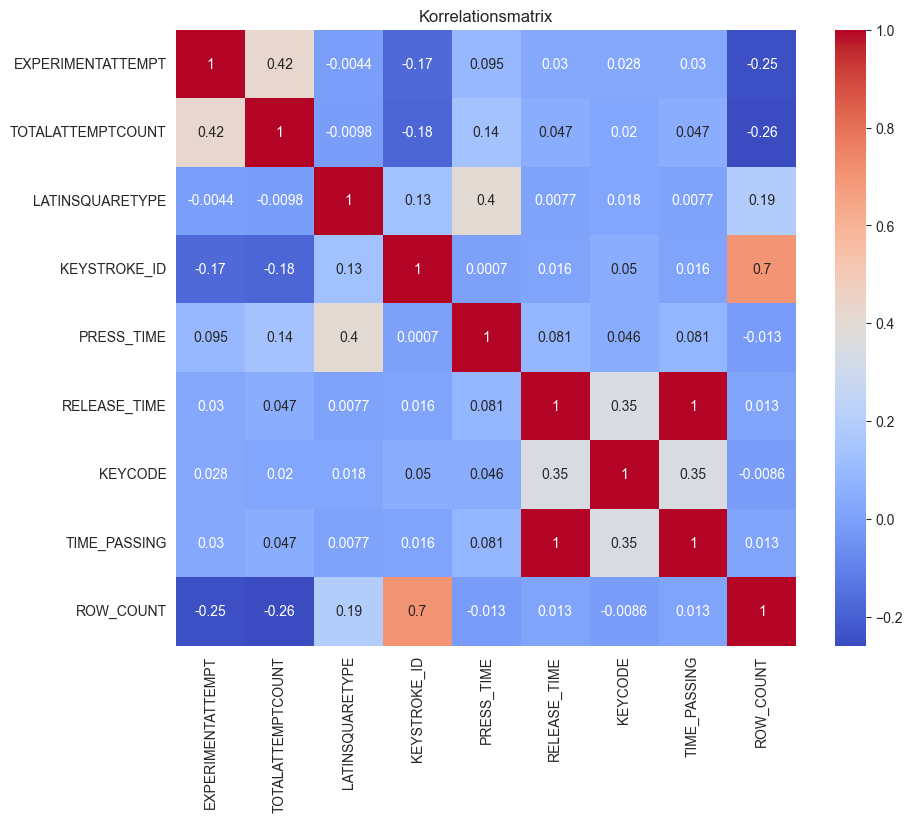

In [54]:
# Correlation

import matplotlib.pyplot as plt
import seaborn as sns

numeric_merged = merged.select_dtypes(include='number')

corr_matrix = numeric_merged.corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()

In [55]:
import pandas as pd

def parse_ranges(ranges_str):
    if pd.isna(ranges_str) or not ranges_str:
        return []
    return [tuple(map(int, r.strip('[]').split(','))) for r in ranges_str.split(';') if r]

def is_keystroke_relevant(keystroke_id, keystroke, ranges):
    relevant = []
    for start, end in ranges:
        if keystroke_id is not None and start <= keystroke_id <= end:
            relevant.append(keystroke_id)
        if str(keystroke).lower() in ['backspace', 'ctrl', 'shift']:
            relevant.append(keystroke_id)
    return list(set(relevant))

def extract_marked_keystrokes(df):
    confident_marked_all = []
    unconfident_marked_all = []

    for idx, row in df.iterrows():
        keystroke_id = row.get('KEYSTROKE_ID', None)
        keystroke = row.get('LETTER', '')
        confident_ranges = parse_ranges(row.get('CONFIDENT', ''))
        unconfident_ranges = parse_ranges(row.get('UNCONFIDENT', ''))

        confident_marked = is_keystroke_relevant(keystroke_id, keystroke, confident_ranges)
        unconfident_marked = is_keystroke_relevant(keystroke_id, keystroke, unconfident_ranges)

        confident_marked_all.append(confident_marked)
        unconfident_marked_all.append(unconfident_marked)

    df['CONFIDENT_MARKED'] = confident_marked_all
    df['UNCONFIDENT_MARKED'] = unconfident_marked_all
    return df

# Beispiel für die Anwendung:
df = pd.read_csv('data/keystrokes/experiment_6140ef8d27499e70e8740918_20250819170107.csv')
df = extract_marked_keystrokes(df)
print(df[['LETTER', 'KEYSTROKE_ID', 'CONFIDENT', 'CONFIDENT_MARKED', 'UNCONFIDENT', 'UNCONFIDENT_MARKED']])

       LETTER  KEYSTROKE_ID       CONFIDENT CONFIDENT_MARKED  \
0    CapsLock             0  [0,35];[44,79]              [0]   
1           C             1  [0,35];[44,79]              [1]   
2    CapsLock             2  [0,35];[44,79]              [2]   
3           a             3  [0,35];[44,79]              [3]   
4           n             4  [0,35];[44,79]              [4]   
..        ...           ...             ...              ...   
177         m           177  [0,35];[44,79]               []   
178         u           178  [0,35];[44,79]               []   
179         d           179  [0,35];[44,79]               []   
180     Shift           180  [0,35];[44,79]            [180]   
181         ?           181  [0,35];[44,79]               []   

            UNCONFIDENT UNCONFIDENT_MARKED  
0    [94,108];[139,168]                 []  
1    [94,108];[139,168]                 []  
2    [94,108];[139,168]                 []  
3    [94,108];[139,168]                 []  
4    [

In [56]:
# df = pd.read_csv('data/keystrokes/experiment_6140ef8d27499e70e8740918_20250819170107.csv')
# df = extract_marked_keystrokes(df)
# print(df[['LETTER', 'POSITION', 'CONFIDENT', 'CONFIDENT_MARKED', 'UNCONFIDENT', 'UNCONFIDENT_MARKED']])